In [2]:
"""importing libraries"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df_india = pd.read_csv("covid_19_india.csv")
df_india

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [4]:
"Checking the range of data"

df_india.shape

(18110, 9)

In [5]:
"Getting information about Data type and non-null values"

df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [6]:
"Getting numeric column detials "

df_india.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [7]:
"Getting information of null values in Dataset"

df_india.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [8]:
"finding unique values from 'State/UnionTerritory' column"

df_india['State/UnionTerritory'].unique(),df_india['State/UnionTerritory'].nunique()

(array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
        'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
        'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
        'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
        'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
        'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
        'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
        'Tripura', 'Nagaland', 'Meghalaya',
        'Dadra and Nagar Haveli and Daman and Diu',
        'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
        'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
        'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
        'Maharashtra***'], dtype=object),
 46)

In [10]:
"Correcting spelling mistakes or impurities"

state_correction_dict = {
    'Bihar****':'Bihar',
    'Dadra and Nagar Haveli':'Dadra and Nagar Haveli and Daman and Diu',
    'Madhya Pradesh***':'Madhya Pradesh',
    'Maharashtra***':'Maharashtra',
    'Karanataka':'Karnataka'
}
def state_correction(state):
    try:
        return state_correction_dict[state]
    except:
        return state
    
df_india['State/UnionTerritory'] = df_india['State/UnionTerritory'].apply(state_correction)
df_india['State/UnionTerritory'].nunique()

41

### 
Note: Here we have corrected spelling mistakes in column 'State/UnionTerritory'.

In [11]:
"Changing the format of date"

df_india['Date'] = pd.to_datetime(df_india['Date'])
df_india['Date'] = df_india['Date'].dt.strftime('%d-%m-%Y')
df_india['Date']

0        30-01-2020
1        31-01-2020
2        01-02-2020
3        02-02-2020
4        03-02-2020
            ...    
18105    11-08-2021
18106    11-08-2021
18107    11-08-2021
18108    11-08-2021
18109    11-08-2021
Name: Date, Length: 18110, dtype: object

In [12]:
"Removing unwanted columns from dataset using 'drop'."

df_india.drop(['Time','ConfirmedIndianNational','ConfirmedForeignNational'],axis = 1,inplace = True)
df_india

,Sno,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,30-01-2020,Kerala,0,0,1
1,2,31-01-2020,Kerala,0,0,1
2,3,01-02-2020,Kerala,0,0,2
3,4,02-02-2020,Kerala,0,0,3
4,5,03-02-2020,Kerala,0,0,3
...,...,...,...,...,...,...
18105,18106,11-08-2021,Telangana,638410,3831,650353
18106,18107,11-08-2021,Tripura,77811,773,80660
18107,18108,11-08-2021,Uttarakhand,334650,7368,342462
18108,18109,11-08-2021,Uttar Pradesh,1685492,22775,1708812


In [13]:
"Getting only Numeric columns"

num = df_india.select_dtypes(exclude = object)
num

,Sno,Cured,Deaths,Confirmed
0,1,0,0,1
1,2,0,0,1
2,3,0,0,2
3,4,0,0,3
4,5,0,0,3
...,...,...,...,...
18105,18106,638410,3831,650353
18106,18107,77811,773,80660
18107,18108,334650,7368,342462
18108,18109,1685492,22775,1708812


In [14]:
"Getting only categorical data"

obj = df_india.select_dtypes(include = object)
obj

,Date,State/UnionTerritory
0,30-01-2020,Kerala
1,31-01-2020,Kerala
2,01-02-2020,Kerala
3,02-02-2020,Kerala
4,03-02-2020,Kerala
...,...,...
18105,11-08-2021,Telangana
18106,11-08-2021,Tripura
18107,11-08-2021,Uttarakhand
18108,11-08-2021,Uttar Pradesh


###
### Data Manipulation

In [15]:
"Identifying active cases , We counted the values by using values in confirmed, cured, deaths column"

df_india['Active'] = df_india['Confirmed'] - df_india['Cured'] - df_india['Deaths']
df_india

,Sno,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active
0,1,30-01-2020,Kerala,0,0,1,1
1,2,31-01-2020,Kerala,0,0,1,1
2,3,01-02-2020,Kerala,0,0,2,2
3,4,02-02-2020,Kerala,0,0,3,3
4,5,03-02-2020,Kerala,0,0,3,3
...,...,...,...,...,...,...,...
18105,18106,11-08-2021,Telangana,638410,3831,650353,8112
18106,18107,11-08-2021,Tripura,77811,773,80660,2076
18107,18108,11-08-2021,Uttarakhand,334650,7368,342462,444
18108,18109,11-08-2021,Uttar Pradesh,1685492,22775,1708812,545


#### Note: We can now check the active cases in each state

In [16]:
"using pivot function to find cured , deaths , confirmed cases State wise"

statewise = pd.pivot_table(df_india,values=['Cured','Deaths','Confirmed'],index='State/UnionTerritory',aggfunc='max',margins=True)
statewise

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,7548,7412,129
Andhra Pradesh,1985182,1952736,13564
Arunachal Pradesh,50605,47821,248
Assam,576149,559684,5420
Bihar,725279,715352,9646
Cases being reassigned to states,9265,0,0
Chandigarh,61992,61150,811
Chhattisgarh,1003356,988189,13544
Dadra and Nagar Haveli and Daman and Diu,10654,10646,4


In [17]:
"Top 10 states with most Active cases"

df_top_10 = df_india.nlargest(10,['Active'])

df_top_10 = df_india.groupby(['State/UnionTerritory'])['Active'].max().sort_values(ascending=False).reset_index()
df_top = df_top_10.nlargest(10,['Active'])
df_top

,State/UnionTerritory,Active
0,Maharashtra,701614
1,Karnataka,605515
2,Kerala,445692
3,Tamil Nadu,313048
4,Uttar Pradesh,310783
5,Rajasthan,212753
6,Andhra Pradesh,211554
7,Gujarat,148297
8,West Bengal,132181
9,Chhattisgarh,131245


In [18]:
"Top 10 states with most deaths cases"

df_deaths_10 = df_india.nlargest(10,['Deaths'])

df_deaths_10 = df_india.groupby(['State/UnionTerritory'])['Deaths'].max().sort_values(ascending=False).reset_index()
df_deaths = df_deaths_10.nlargest(10,['Deaths'])

df_deaths

,State/UnionTerritory,Deaths
0,Maharashtra,134201
1,Karnataka,36848
2,Tamil Nadu,34367
3,Delhi,25068
4,Uttar Pradesh,22775
5,West Bengal,18252
6,Kerala,18004
7,Punjab,16322
8,Andhra Pradesh,13564
9,Chhattisgarh,13544


In [19]:
"Finding recovery rate and deathrate"

statewise['Recoveryrate'] = statewise['Cured']*100/statewise['Confirmed']
statewise['Deathrate'] = statewise['Deaths']*100/statewise['Confirmed']
statewise

,Confirmed,Cured,Deaths,Recoveryrate,Deathrate
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,7548,7412,129,98.198198,1.709062
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Arunachal Pradesh,50605,47821,248,94.498567,0.490070
Assam,576149,559684,5420,97.142232,0.940729
Bihar,725279,715352,9646,98.631285,1.329971
Cases being reassigned to states,9265,0,0,0.000000,0.000000
Chandigarh,61992,61150,811,98.641760,1.308233
Chhattisgarh,1003356,988189,13544,98.488373,1.349870
Dadra and Nagar Haveli and Daman and Diu,10654,10646,4,99.924911,0.037545


In [20]:
"Correlation amongs the columns"

statewise.corr()

,Confirmed,Cured,Deaths,Recoveryrate,Deathrate
Confirmed,1.000000,0.999902,0.939570,0.195490,0.268146
Cured,0.999902,1.000000,0.940407,0.197970,0.271160
Deaths,0.939570,0.940407,1.000000,0.150257,0.381246
Recoveryrate,0.195490,0.197970,0.150257,1.000000,0.542027
Deathrate,0.268146,0.271160,0.381246,0.542027,1.000000


#### Data visualization

Total Confirmed cases = 5451678687
Total Cured cases = 5046125452
Total Active cases = 332164230
Total Death cases = 73389005


C:\Users\irg\AppData\Local\Temp\ipykernel_7528\2080641708.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_yticklabels(labels=(barplot.get_yticks()*1).astype(int))


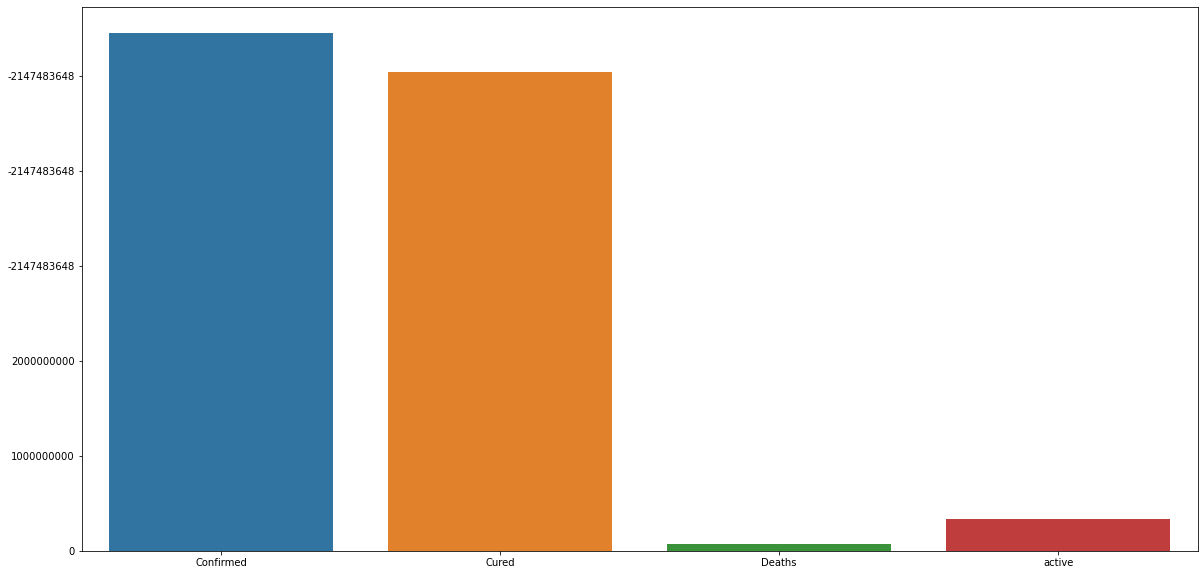

In [21]:
"""Barplot for Confirmed , Deaths , Cured , Active"""
fig = plt.figure(figsize=(20,10))

confirm= df_india['Confirmed'].sum()
cured = df_india['Cured'].sum()
deaths= df_india['Deaths'].sum()
active= df_india['Active'].sum()

print('Total Confirmed cases =',confirm)
print('Total Cured cases =',cured)
print('Total Active cases =',active)
print('Total Death cases =',deaths)

barplot = sns.barplot(x=['Confirmed','Cured','Deaths','active'],y=[confirm,cured,deaths,active])
barplot.set_yticklabels(labels=(barplot.get_yticks()*1).astype(int))

plt.show()

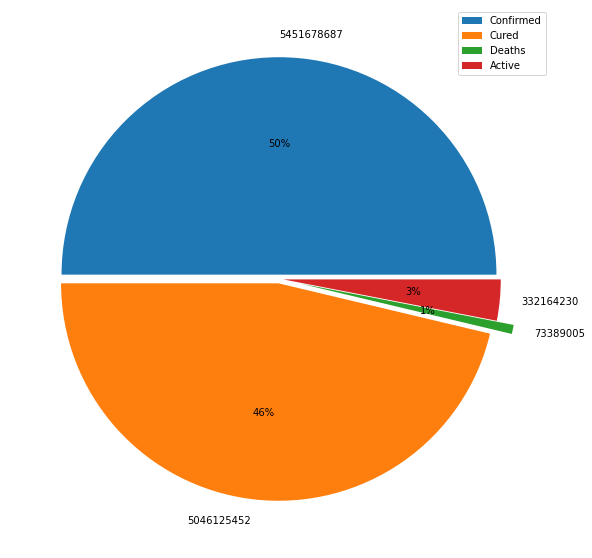

In [22]:
"Piechart for 'Confirmed','Cured',Deaths & 'Active'"

fig = plt.figure(figsize=(17,10))
df_values = [df_india['Confirmed'].sum(),df_india['Cured'].sum(),df_india['Deaths'].sum(),df_india['Active'].sum()]
df_keys = [confirm,cured,deaths,active]


plt.pie(df_keys,labels = df_keys, explode = (0.02,0.02,0.1,0.02), autopct = '%.0f%%')
plt.legend(['Confirmed','Cured','Deaths','Active'])

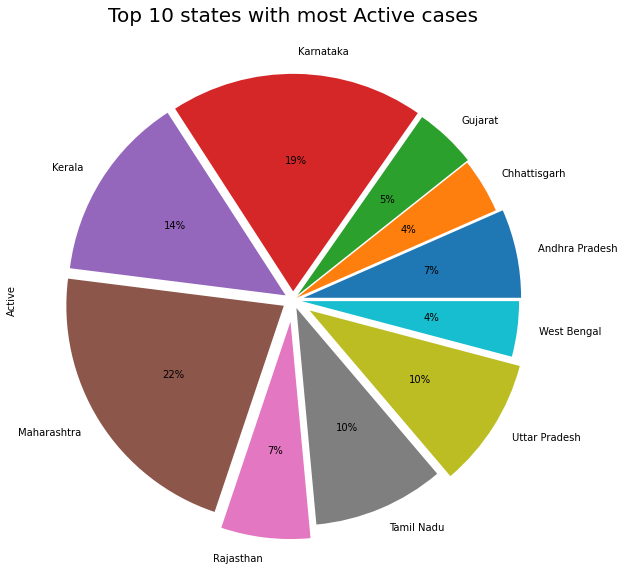

In [23]:
"Pie Chart Of 10 Top states with Active Cases"

fig = plt.figure(figsize=(17,10))
df_top.groupby(["State/UnionTerritory"]).sum()["Active"].plot(kind='pie',rot=90,explode=(0.05,0.02,0.03,0.04,0.04,0.05,0.1,0.04,0.09,0.04),autopct='%1.0f%%')
plt.title('Top 10 states with most Active cases',size=20)
plt.show()

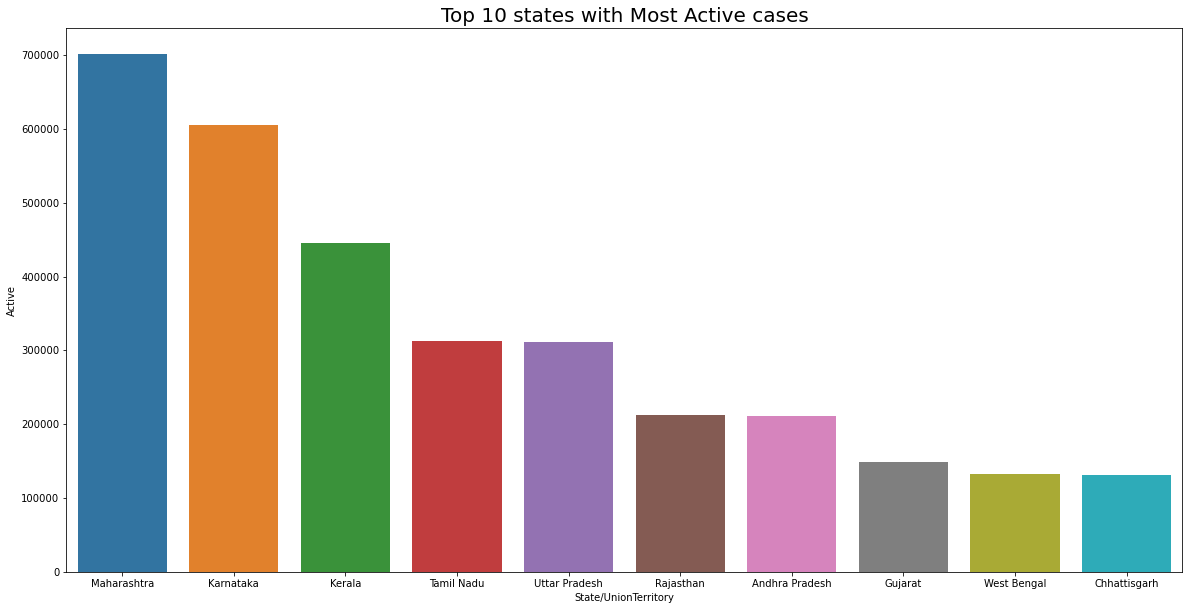

In [24]:
"Bar Plot Of Top 10 Active Cases"

fig = plt.figure(figsize=(20,10))
sns.barplot(data = df_top.iloc[:10],y='Active',x='State/UnionTerritory')
plt.title('Top 10 states with Most Active cases', size=20)
plt.show()

### Note : As per above visual's it is clear that Maharashtra has maximum number of Active cases wheras Chhattisgarh has the least number of Active cases

Text(0.5, 1.0, 'Pie chart of top 10 states with most death cases')

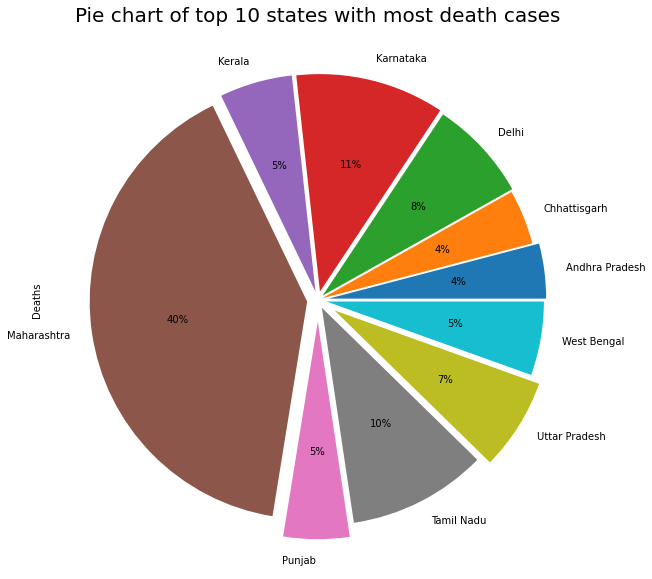

In [25]:
"""Pie chart of top 10 states with most death cases"""

fig = plt.figure(figsize=(17,10))
df_deaths.groupby(["State/UnionTerritory"]).sum()["Deaths"].plot(kind='pie',rot=90,explode=(0.05,0.02,0.03,0.04,0.04,0.05,0.1,0.04,0.09,0.04),autopct='%1.0f%%')
plt.title("Pie chart of top 10 states with most death cases",size = 20)

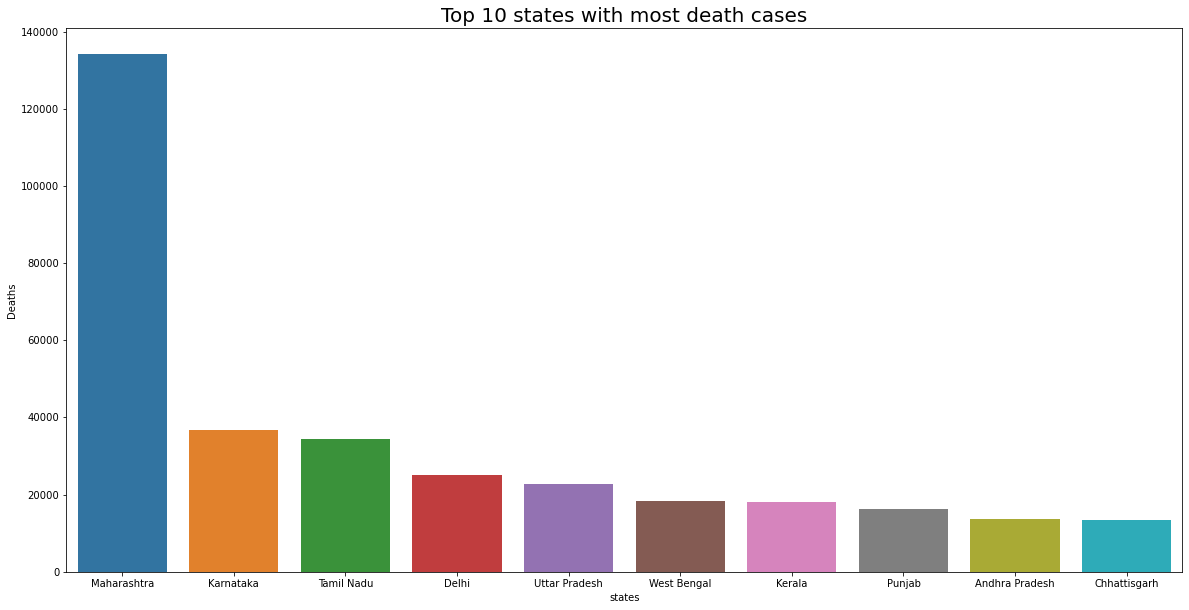

In [26]:
"Bar graph with top 10 states with most Death cases"


df_deaths = df_india.groupby('State/UnionTerritory').max()[['Deaths','Date']].sort_values(by='Deaths',ascending=False).reset_index()
fig = plt.figure(figsize=(20,10))
plot1 = sns.barplot(data = df_deaths.iloc[:10],y='Deaths',x='State/UnionTerritory')
plt.title('Top 10 states with most death cases', size=20)
plt.xlabel('states')
plt.ylabel('Deaths')
plt.show()

##### Note : As per above visual's it is clear that Maharashtra has most number of death cases and Chhattisgarh has least number of death cases

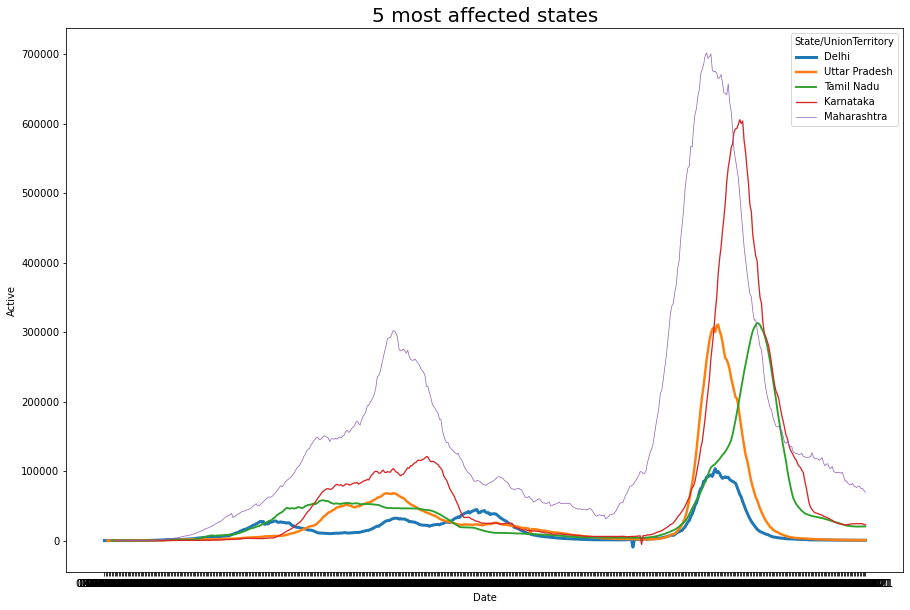

In [27]:
" Top 5 Most affected states"

fig = plt.figure(figsize=(15,10))
plot = sns.lineplot(data = df_india[df_india['State/UnionTerritory'].isin(['Maharashtra','Karnataka','Tamil Nadu','Delhi','Uttar Pradesh'])],x='Date',y='Active',hue = 'State/UnionTerritory',size='State/UnionTerritory')
plt.title('5 most affected states',size=20)
plt.show()